In [ ]:
!pip install -q librosa tensorflow numpy matplotlib seaborn

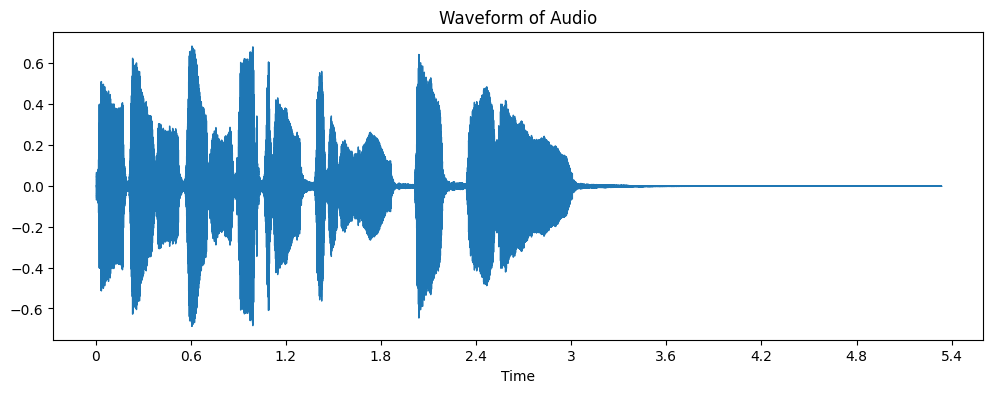

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
file_path = librosa.example('trumpet')  # Sample trumpet sound
y, sr = librosa.load(file_path)

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio")
plt.show()


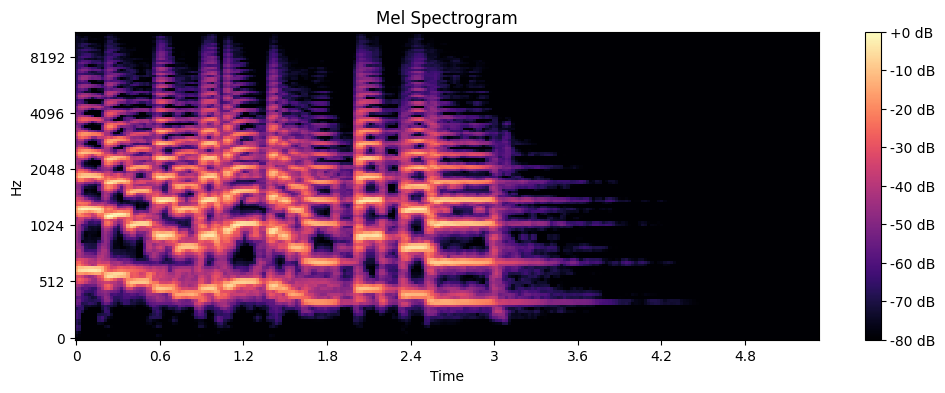

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np # Import numpy and assign it the alias 'np'

# Convert to Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Display spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, x_axis="time", y_axis="mel") # Now np.max will be recognized
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

In [ ]:
pip install datasets


In [ ]:
from datasets import load_dataset

dataset = load_dataset("Feanix/gtzan-10-sec")


In [ ]:
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 2988
    })
})


In [ ]:
from datasets import load_dataset

# Load the GTZAN dataset (10-sec audio clips)
dataset = load_dataset("Feanix/gtzan-10-sec")

# Check dataset structure
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 2988
    })
})


In [ ]:
import IPython.display as ipd

# Select the first sample
sample = dataset['train'][0]

# Extract audio and play
audio = sample['audio']
ipd.Audio(audio['array'], rate=audio['sampling_rate'])


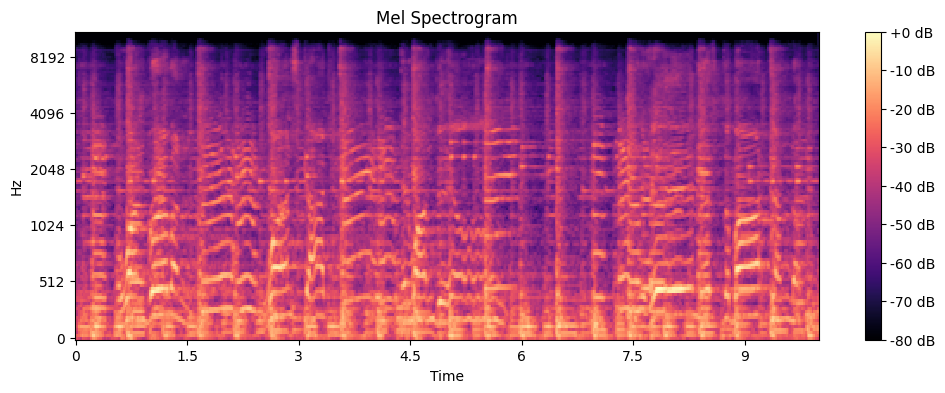

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio sample
y = np.array(audio['array'])  # Convert audio data to NumPy array
sr = audio['sampling_rate']

# Convert to Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Display Spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()


In [ ]:
def extract_mfcc(y, sr, n_mfcc=40):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)  # Compute mean across time axis

# Extract MFCCs
mfcc_features = extract_mfcc(y, sr)
print("MFCC Features Shape:", mfcc_features.shape)


MFCC Features Shape: (40,)


In [ ]:
print(dataset['train'][0])  # Print first sample in the dataset


{'file': '/storage/hf-datasets-cache/medium/datasets/63209695958797-config-parquet-and-info-Feanix-gtzan-10-sec-a9a4795e/downloads/extracted/6927408ecfd7ea078364a72db667722d9df819cdb2f7fef5ba4e0bca9958ce5d/genres/blues/blues.00000_1.wav', 'audio': {'path': 'blues.00000_1.wav', 'array': array([0.00732422, 0.01660156, 0.00762939, ..., 0.07623291, 0.07675171,
       0.08129883]), 'sampling_rate': 22050}, 'genre': 0}


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Extract MFCC features and labels from the dataset
X = []
Y = []

for sample in dataset['train']:
    y = np.array(sample['audio']['array'])  # Audio data
    sr = sample['audio']['sampling_rate']  # Sampling rate
    label = sample['genre']  # ✅ Use 'genre' instead of 'label'

    # Extract MFCC features
    features = extract_mfcc(y, sr)
    X.append(features)
    Y.append(label)

# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Check dataset shape
print("Feature Shape:", X.shape)
print("Labels Shape:", Y.shape)


Feature Shape: (2988, 40)
Labels Shape: (2988,)


In [ ]:
# Get unique genre labels
unique_genres = set(sample['genre'] for sample in dataset['train'])

# Convert genre numbers to actual names
genre_mapping = {i: dataset['train'].features['genre'].int2str(i) for i in unique_genres}

# Print genre mapping
print("Genre Mapping:", genre_mapping)


Genre Mapping: {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Check dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (2390, 40)
Testing Data Shape: (598, 40)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Helps prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(len(genre_mapping), activation='softmax')  # Output layer (num of genres)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2368 - loss: 2.1061 - val_accuracy: 0.4465 - val_loss: 1.5818
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4389 - loss: 1.5644 - val_accuracy: 0.5217 - val_loss: 1.3315
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5287 - loss: 1.3324 - val_accuracy: 0.5702 - val_loss: 1.2009
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5753 - loss: 1.1923 - val_accuracy: 0.5920 - val_loss: 1.1105
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6019 - loss: 1.1378 - val_accuracy: 0.6304 - val_loss: 1.0402
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6402 - loss: 1.0265 - val_accuracy: 0.6522 - val_loss: 0.9967
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6557 - loss: 0.9830 - val_accuracy: 0.6890 - val_loss: 0.9357
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6887 - loss: 0.9145 - val_accuracy: 0.6990 - val_loss:

In [ ]:
# Evaluate performance
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7832 - loss: 0.6239 
Test Accuracy: 0.8093645572662354


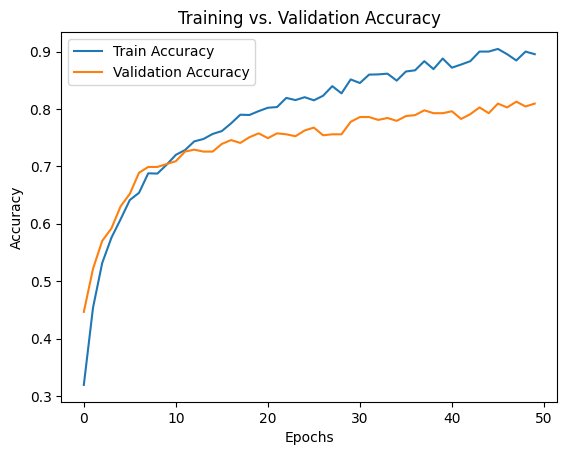

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()


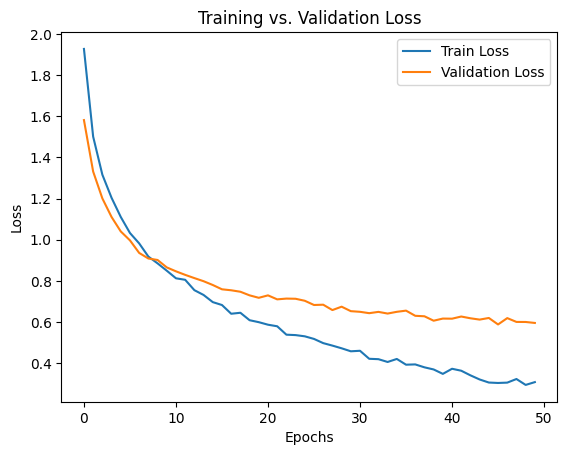

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


In [ ]:
import numpy as np

# Pick a random test sample
random_index = np.random.randint(0, X_test.shape[0])
sample_features = X_test[random_index].reshape(1, -1)  # Reshape for model input
true_label = Y_test[random_index]

# Make prediction
predicted_label = np.argmax(model.predict(sample_features), axis=1)[0]

# Print results
print(f"True Genre: {genre_mapping[true_label]}")
print(f"Predicted Genre: {genre_mapping[predicted_label]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
True Genre: classical
Predicted Genre: jazz


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


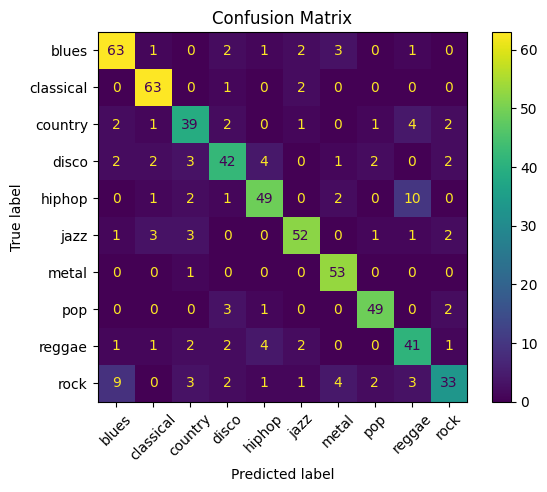

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for all test samples
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[genre_mapping[i] for i in genre_mapping])
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
